# Un modèle de regression linéaire

In [1]:
%matplotlib notebook

In [2]:
# On charge les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
# On définit et on représente graphiquement le jeu de données
m=200 # taille de l'échantillon
X=np.linspace(0,10,m)
y=X+np.random.randn(m) # y est une copie de X légèrement et aléatoirement bruité


<IPython.core.display.Javascript object>


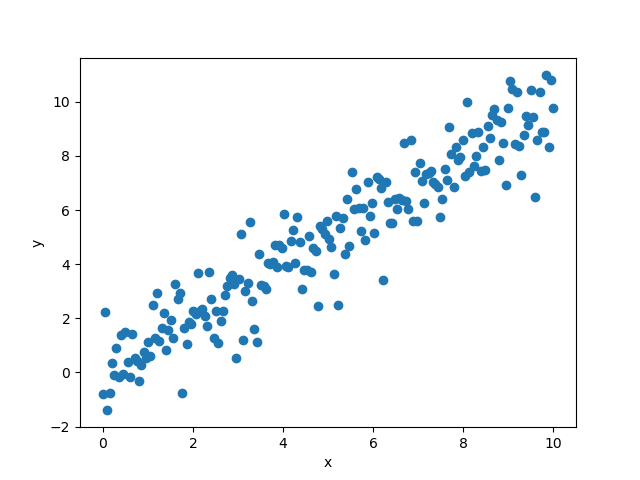

In [4]:
plt.figure()
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 1) Régression avec SKlearn

In [5]:
X=X.reshape(m,1)
y=y.reshape(m,1) 


#### Vu la forme de l'échantillon, on propose de développer un modèle de régression linéaire

In [6]:
# A l'aide de SKlearn
from sklearn.linear_model import LinearRegression

In [7]:
# Définir un modèle de regression linéaire des données à l'aide de scikit_learn
reg=LinearRegression()

In [8]:
#  Apprentissage du modèle à partir des données
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# valeur de a
a=reg.coef_[0][0]
print(f'a = {a}')

a = 0.9771901108357082


In [10]:
 # valeur de b
b=reg.intercept_[0]
print(f'b = {b}')

b = 0.07244068794694503


In [11]:
# Calcul du score et validation du modèle
score=reg.score(X,y)
print(f'Score : {score}')
    

Score : 0.8922499129810709


<IPython.core.display.Javascript object>


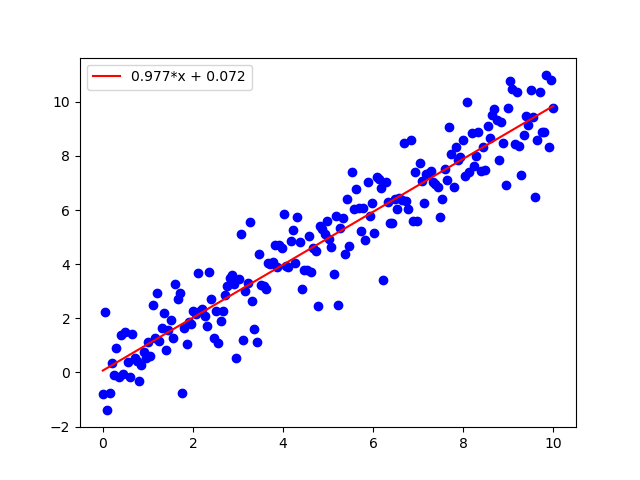

In [12]:
# Le score est très acceptable, donc...
#  Utiliser le modèle pour des prédictions et représenter sur un même graphique les données réelles et les données prédites
prediction= reg.predict(X)
plt.figure()
plt.scatter(X,y,c='blue')
plt.plot(X,prediction,c='red',label=f'{round(a,3)}*x + {round(b,3)}')
plt.legend()
print()

## 3) A l'aide de nos connaissances en statistiques

In [13]:
# Calculer les moyennes de X et de y
print(X.mean(),y.mean())

5.000000000000001 4.9583912421254865


In [14]:
# Calculer la covariance cov(X,y)
X1=X.reshape(1,X.size)
y1=y.reshape(1,y.size)
cov=np.cov(X1,y1)
print(cov)
print(f'Cov(x,y) : {cov[1][0]}')



[[8.45938234 8.26642477]
 [8.26642477 9.05336993]]
Cov(x,y) : 8.266424765282753


In [15]:
# Calculer la variance de X
var=np.var(X1)
print()

In [16]:
# En déduire les coefficients a et b
a= cov[1][0]/var
b= y.mean()-X.mean()*a
print(f'a = {a}')
print(f'b = {b}')



a = 0.9821006139052346
b = 0.047888172599312995


<IPython.core.display.Javascript object>


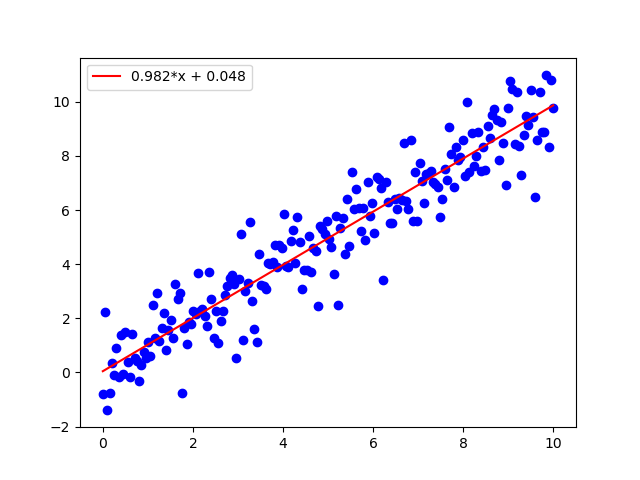

In [17]:
# Dessiner le nuage de points et la droite de régression obtenue

# Le score est très acceptable, donc...
#  Utiliser le modèle pour des prédictions et représenter sur un même graphique les données réelles et les données prédites
a= cov[1][0]/var
b= y.mean()-X.mean()*a
plt.figure()
prediction=X*a+b
plt.scatter(X,y,c='blue')
plt.plot(X,prediction,label=f'{round(a,3)}*x + {round(b,3)}',color='red')
plt.legend()
print()

## 2) A l'aide d'une descente de gradient

In [18]:
'''Moyenne des erreurs quadratiques'''
def errMSE(a,b):
    return np.sum((a*X+b-y)**2)/m

'''Moyenne des erreurs absolues'''
def errMAE(a,b):
    return np.sum(abs(a*X+b-y))/m

'''Médiane des erreurs absolues'''
def errMedAE(a,b):
    vAbs=abs(a*X+b-y)
    vAbs=np.sort(vAbs)
    l=vAbs.size
    if l%2==0:
        return (vAbs[l//2]+vAbs[l//2+1])/2
    else:
        return vAbs[l//2+1]
    
def score(Xt,yt,a,b):
    yt_moyen=yt.mean()
    return 1- (np.sum((a*Xt+b-yt)**2)/np.sum((yt_moyen-yt)**2))
    
'''retourne 2D array de err(a,b) pour tout a et tout b'''
def err(err,A,B):
    return np.array([ [ err(a,b) for a in A] for b in B])

In [19]:
errMSE(1,1)

2.059952029470683

In [20]:
'''#f : fonction cout , d : point départ , alpha : learning rate ( coef de deplacement) 
eps: precision , N : maxIteration'''
def grad2(f,d,alpha,eps,N):
    a,b=d
    D=[(a,b)]
    norme=1
    while len(D)<N and norme>eps:
        grad_a = (f(a+eps,b)-f(a-eps,b))/(2*eps)    # taux d'accroissement en a  precision eps
        grad_b = (f(a,b+eps)-f(a,b-eps))/(2*eps)    # taux d'accroissement en b  precision eps
        norme=(grad_a**2+grad_b**2)**(0.5) 
        a = a -grad_a*alpha
        b = b -grad_b*alpha
        D.append((a,b))
    return D

In [21]:
#depart
a1=-2
b1=2

#arrivée
a0= cov[1][0]/var
b0= y.mean()-X.mean()*a


D= grad2(errMSE,(a1,b1),0.02,0.0001,20000) # met du temps mais stocke les points
(a,b)=D[-1]
print(len(D))
print(f'a = {a}')
print(f'b = {b}')





947
a = 0.9771601695663952
b = 0.0726393228859572


<IPython.core.display.Javascript object>


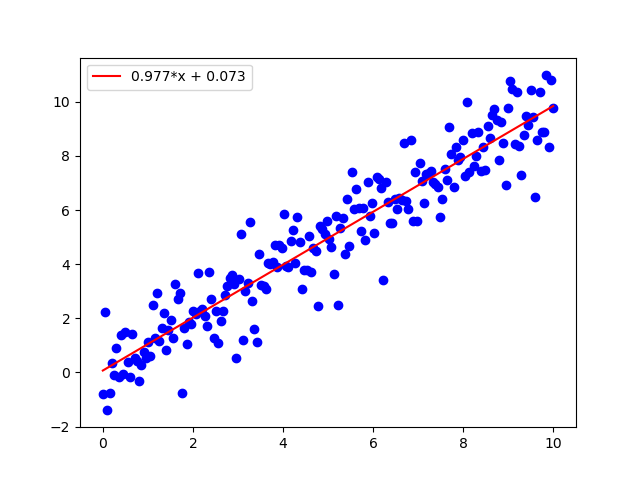

In [22]:
# Dessiner le nuage de points et la droite de régression obtenue
plt.figure()
prediction=X*a+b
plt.scatter(X,y,c='blue')
plt.plot(X,prediction,label=f'{round(a,3)}*x + {round(b,3)}',color='red')
plt.legend()
print()

## Convergence de a et b

<IPython.core.display.Javascript object>


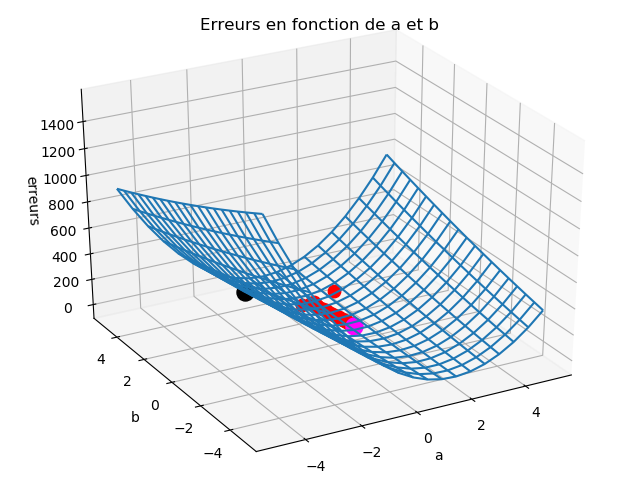

Termine


In [23]:
from mpl_toolkits.mplot3d import Axes3D


def conver3D(depart,arrivee,fonction_cout,descente):
    N=20
    a1,b1=depart
    a0,b0=arrivee
    A=np.linspace(-5,5,N)
    B=np.linspace(-5,5,N)
    Erreurs=err(fonction_cout,A,B)
    A,B=np.meshgrid(A,B)

    fig=plt.figure()
    ax=Axes3D(fig)
    ax.scatter(a1,b1,fonction_cout(a1,b1),marker='o',s=150,color='black')
    ax.scatter(a0,b0,fonction_cout(a0,b0),marker='o',s=150,color='fuchsia')
    
    surf = ax.plot_wireframe(A,B,Erreurs, rstride=1, cstride=1)
    plt.title("Erreurs en fonction de a et b")
    ax.set_xlabel("a")
    ax.set_ylabel("b")
    ax.set_zlabel("erreurs")
    plt.show()
    i=0
    while i< len(descente)-1:
        a,b= descente[i+1]
        ax.scatter(a,b,fonction_cout(a,b),marker='o',color='red',s=80,label=f'iteration : {i+1}')
        i+=1
        fig.canvas.draw()
        plt.pause(0.001)
    print("Termine")





Nb_points=100
descente=[ point for i,point in enumerate(D) if i%(len(D)//Nb_points)==0 or i<20]

conver3D((a1,b1),(a0,b0),errMSE,descente)
    



<IPython.core.display.Javascript object>


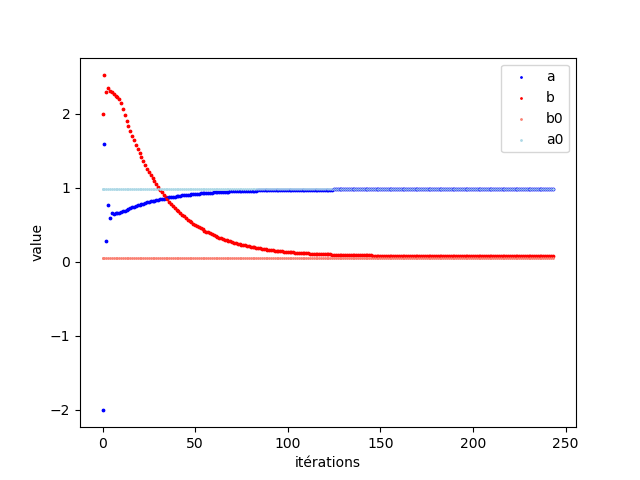

Termine


In [24]:
def conver2D(depart,arrivee,descente):
    a1,b1=depart
    a0,bo=arrivee
    fig=plt.figure()
    plt.scatter(0,a1,c='blue',label="a",s=1)
    plt.scatter(0,b1,c='red',label="b",s=1)
    plt.scatter(0, b0,c='salmon',s=1,label="b0")
    plt.scatter(0, a0,c='lightblue',s=1,label="a0")
    plt.xlabel("itérations")
    plt.ylabel("value")
    plt.legend()
    plt.show()
    i=0
    while i< len(descente):
        a,b= descente[i]
        plt.scatter(i, a,c='blue',s=3)
        plt.scatter(i, b,c='red',s=3)
        plt.scatter(i, b0,c='salmon',s=1)
        plt.scatter(i, a0,c='lightblue',s=1)
        plt.legend()
        i+=1
        fig.canvas.draw()
        plt.pause(0.001)
    print("Termine")
    
Nb_points=200
descente=[ point for i,point in enumerate(D) if i%(len(D)//Nb_points)==0 or i<10]
conver2D((a1,b1),(a0,b0),descente)


## Visualisation de l'apprentissage 

<IPython.core.display.Javascript object>


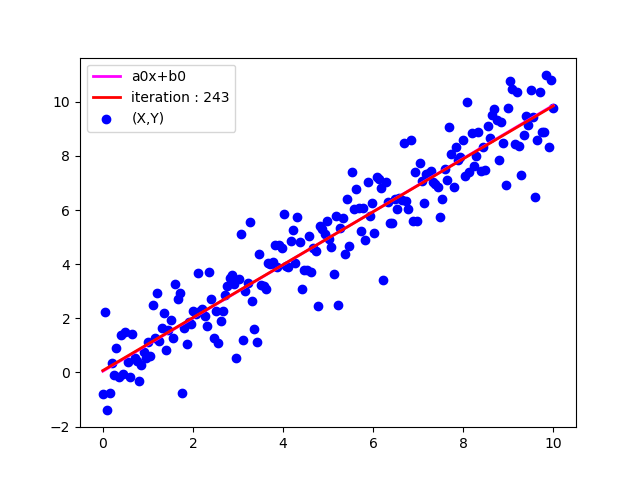

Termine


In [25]:
def visual_A(depart,arrivee,descente):
    a1,b1=depart
    a0,bo=arrivee
    fig=plt.figure()
    plt.scatter(X, y,c='blue',label="(X,Y)")
    plt.show()
    fig.canvas.draw()
    i=0
    while i< len(descente):
        a,b= descente[i]
        fig.clear()
        plt.scatter(X, y,c='blue',label="(X,Y)")
        plt.plot(X, a0*X+b0,c='fuchsia', linewidth=2,label='a0x+b0');
        line=plt.plot(X, a*X+b,c='red',linewidth=2,label=f'iteration : {i}');
        plt.legend()
        i+=1
        fig.canvas.draw()
        plt.pause(0.001)
    print('Termine')show

Nb_points=200
descente=[ point for i,point in enumerate(D) if i%(len(D)//Nb_points)==0 or i<10]
visual_A((a1,b1),(a0,b0),descente)